# Random NN modes

This tutorial shows how to calculate descriptors using `xenonpy.descriptor` system. We will calculate compositional and structural descriptors using `xenonpy.descriptor.Compositions` and `xenonpy.descriptor.Structures` respectively.

We need some sample data to execute these calculations. If you don't have it, please see https://github.com/yoshida-lab/XenonPy/blob/master/samples/build_sample_data.ipynb.

### useful functions

Run this cell will load some well-used packages such as `numpy`, `pandas`, and so on.
The running will also import some valuable functions which are written by ourselves.
There is no magic,  see `samples/tools.ipynb` to know what will be imported.

In [1]:
%run tools.ipynb

### sequential linear model

`SequentialLinear` is a sequential model.

In [2]:
from xenonpy.model import SequentialLinear
SequentialLinear?

Init signature:
SequentialLinear(
    in_features: int,
    out_features: int,
    bias: bool = True,
    *,
    h_neurons: Union[Tuple[float, ...], Tuple[int, ...]] = (),
    h_bias: Union[bool, Tuple[bool, ...]] = True,
    h_dropouts: Union[float, Tuple[float, ...]] = 0.1,
    h_normalizers: Union[float, NoneType, Tuple[Union[float, NoneType], ...]] = 0.1,
    h_activation_funcs: Union[Callable, NoneType, Tuple[Union[Callable, NoneType], ...]] = ReLU(),
)
Docstring:     
Sequential model with linear layers and configurable other hype-parameters.
e.g. ``dropout``, ``hidden layers``
Init docstring:
Parameters
----------
in_features
    Size of input.
out_features
    Size of output.
bias
    Enable ``bias`` in input layer.
h_neurons
    Number of neurons in hidden layers.
    Can be a tuple of floats. In that case,
    all these numbers will be used to calculate the neuron numbers.
    e.g. (0.5, 0.4, ...) will be expanded as (in_features * 0.5, in_features * 0.4, ...)
h_bias
    ``bi

In [3]:
model = SequentialLinear(290, 1, h_neurons=(0.8, 0.7, 0.6))
model

SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=232, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(232, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=232, out_features=203, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(203, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_2): LinearLayer(
    (linear): Linear(in_features=203, out_features=174, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(174, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (output): Linear(in_features=174, out_features=1, bias=True)
)

### fully randomized model

In [4]:
from math import ceil
from random import uniform

from xenonpy.model.utils import ParameterGenerator

generator = ParameterGenerator(
    in_features=290,
    out_features=1,
    h_neurons=dict(
        data=[ceil(uniform(0.1, 1.2) * 290) for _ in range(100)], 
        repeat=(2, 3, 4, 5)
    )
)

Call a instance of `ParameterGenerator` will return a generator.
This generator can randomly selected parameters from parameter candidate and yield them as a dict.

Use `for parameters in pg(num_of_models)` to get these parameters. 

In [5]:
for parameters in generator(num=10):
    print(parameters)

{'in_features': 290, 'out_features': 1, 'h_neurons': (80, 133)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (314, 41, 57, 293, 314)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (71, 306)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (104, 134, 147)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (183, 74, 249, 153, 75)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (33, 318, 100, 154)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (150, 97, 154)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (104, 104, 174, 342)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (211, 158, 46, 185, 256)}
{'in_features': 290, 'out_features': 1, 'h_neurons': (206, 202, 348, 36)}


Feed a model class to the call of instance is possible. In that case, model class will be used as a factory function, by feeding generated parameters into the factory function, new models will be yield as the second parameter. 

In [6]:
for parameters, model in generator(1, factory=SequentialLinear):
    print('parameters: ', parameters)
    print(model)

parameters:  {'in_features': 290, 'out_features': 1, 'h_neurons': (158, 75, 249, 232)}
SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=158, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(158, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=158, out_features=75, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(75, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_2): LinearLayer(
    (linear): Linear(in_features=75, out_features=249, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(249, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_3): LinearLayer(
    (linear): Linear(in_features=249, out_features=232, bias=True)
    (dropout)

### scheduled random model

Candidate parameters can be a function. In this case, the function return generated parameters follow the input number.

In [7]:
generator = ParameterGenerator(
    in_features=290,
    out_features=1,
    h_neurons=dict(
        data=lambda n: sorted(np.random.uniform(0.2, 0.8, size=n), reverse=True), 
        repeat=(2, 3, 4, 5)
    )
)

In [8]:
for parameters, model in generator(1, factory=SequentialLinear):
    print('parameters: ', parameters)
    print(model)

parameters:  {'in_features': 290, 'out_features': 1, 'h_neurons': (0.7898911531921178, 0.43208771466307383, 0.39546221430188244)}
SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=230, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(230, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=230, out_features=126, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(126, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_2): LinearLayer(
    (linear): Linear(in_features=126, out_features=115, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(115, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (output): Linear(in_features=115, out_features=1, bias=Tru

### modle training

Use `xenonpy.model.training.Trainer` and plug-ins to train a model.

In [9]:
import torch
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from torch.utils.data import DataLoader
from pymatgen import Structure

from xenonpy.model.training import Trainer, SGD, MSELoss, Adam, ReduceLROnPlateau, ExponentialLR, ClipNorm
from xenonpy.model.training.extension import Validator, TensorConverter, Persist
from xenonpy.model.training.dataset import ArrayDataset, CrystalGraphDataset
from xenonpy.model.utils import regression_metrics

from xenonpy.datatools import preset, Splitter
from xenonpy.descriptor import Compositions

In [10]:
# if you have not have the samples data
# preset.build('mp_samples', api_key=<your materials project api key>)

data = preset.mp_samples
data.head(5)

,band_gap,composition,density,e_above_hull,efermi,elements,final_energy_per_atom,formation_energy_per_atom,pretty_formula,structure,volume
mp-1008807,0.0000,"{'Rb': 1.0, 'Cu': 1.0, 'O': 1.0}",4.784634,0.996372,1.100617,"[Rb, Cu, O]",-3.302762,-0.186408,RbCuO,"[[-3.05935361 -3.05935361 -3.05935361] Rb, [0....",57.268924
mp-1009640,0.0000,"{'Pr': 1.0, 'N': 1.0}",8.145777,0.759393,5.213442,"[Pr, N]",-7.082624,-0.714336,PrN,"[[0. 0. 0.] Pr, [1.57925232 1.57925232 1.58276...",31.579717
mp-1016825,0.7745,"{'Hf': 1.0, 'Mg': 1.0, 'O': 3.0}",6.165888,0.589550,2.424570,"[Hf, Mg, O]",-7.911723,-3.060060,HfMgO3,"[[2.03622802 2.03622802 2.03622802] Hf, [0. 0....",67.541269
mp-1017582,0.0000,"{'La': 1.0, 'Pt': 3.0, 'C': 1.0}",14.284261,0.523635,8.160496,"[La, Pt, C]",-6.684482,-0.215712,LaPt3C,"[[0. 0. 0.] La, [0. 2.20339716 2.20339...",85.579224
mp-1021511,1.5186,"{'Cd': 1.0, 'S': 1.0}",2.582691,0.252860,-2.121180,"[Cd, S]",-2.909105,-0.719529,CdS,"[[2.12807605 1.22864286 2.67990375] Cd, [-2.46...",92.890725


In [11]:
prop = data[data.volume <= 2500]['volume'].to_frame()
desc = Compositions(featurizers='classic').transform(data.loc[prop.index]['composition'])

desc.head(5)
prop.head(5)

,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
mp-1008807,24.666667,174.067140,209.333333,25.666667,55.004267,1297.063333,72.868680,1646.90,139.333333,128.333333,...,1.0,2.0,0.360,0.02658,152.0,150.0,182.0,349.5,317.5,0.802
mp-1009640,33.000000,137.000000,232.500000,19.050000,77.457330,1931.200000,43.182441,1892.85,137.000000,123.500000,...,2.0,2.0,0.192,0.02583,155.0,166.0,193.0,360.6,333.6,1.100
mp-1016825,21.600000,153.120852,203.400000,13.920000,50.158400,1420.714000,76.663625,343.82,102.800000,96.000000,...,2.0,2.0,0.146,0.02658,152.0,150.0,182.0,302.1,317.5,0.802
mp-1017582,59.400000,139.000000,232.800000,11.020000,147.233694,4226.000000,150.200000,1037.58,137.600000,124.800000,...,1.0,2.0,0.133,13.00000,170.0,177.0,204.0,275.4,2475.0,1.670
mp-1021511,32.000000,140.500000,226.000000,14.300000,72.237000,877.912000,24.850000,272.50,124.500000,119.500000,...,2.0,3.0,0.232,0.20500,180.0,189.0,215.0,284.8,2310.0,2.900


,volume
mp-1008807,57.268924
mp-1009640,31.579717
mp-1016825,67.541269
mp-1017582,85.579224
mp-1021511,92.890725


In [12]:
sp = Splitter(prop.shape[0])
x_train, x_val, y_train, y_val = sp.split(desc, prop)

In [13]:
x_train.shape
y_train.shape
x_val.shape
y_val.shape

(738, 290)

(738, 1)

(185, 290)

(185, 1)

In [14]:
trainer = Trainer(
    optimizer=Adam(lr=0.01),
    loss_func=MSELoss(),
#     clip_grad=ClipNorm(max_norm=0.5),
#     lr_scheduler=ExponentialLR(gamma=0.99),
)

plugin-ins

In [15]:
trainer.extend(
    TensorConverter(),
    Validator(metrics_func=regression_metrics, early_stopping=20, trace_order=5, mae=0.0, pearsonr=1.0),
)

Trainer(clip_grad=None, cuda=None, epochs=200, loss_func=MSELoss(),
        lr_scheduler=None, model=None, non_blocking=False, optimizer=None)

In [16]:
train_dataset = DataLoader(ArrayDataset(x_train, y_train), shuffle=True, batch_size=1000)
val_dataset = DataLoader(ArrayDataset(x_val, y_val), batch_size=1000)

In [17]:
def make_name(model):
    name = []
    for n, m in model.named_children():
        if 'layer_' in n:
            name.append(str(m.linear.in_features))
        else:
            name.append(str(m.in_features))
            name.append(str(m.out_features))
    return '-'.join(name)

In [18]:
generator = ParameterGenerator(
    in_features=290,
    out_features=1,
    h_neurons=dict(
        data=lambda n: sorted(np.random.uniform(0.2, 0.8, size=n), reverse=True), 
        repeat=(3, 4, 5, 6)
    )
)

In [23]:
for para, model in generator(2, factory=SequentialLinear):
    print(model)
    model_name = make_name(model)
    persist = Persist(f'trained_models/{model_name}', increment=False, sync_training_step=True)
    _ = trainer.extend(persist)
    trainer.reset(to=model)
    
    trainer.fit(training_dataset=train_dataset, validation_dataset=val_dataset, epochs=2000)

Training:   0%|          | 2/2000 [00:00<01:51, 17.95it/s]

SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=145, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(145, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=145, out_features=116, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(116, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_2): LinearLayer(
    (linear): Linear(in_features=116, out_features=98, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(98, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (output): Linear(in_features=98, out_features=1, bias=True)
)


Training:   0%|          | 2/2000 [00:00<02:19, 14.33it/s]

Early stopping is applied: no improvement for ['mae', 'pearsonr'] since the last 21 iterations, finish training at iteration 397
SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=217, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(217, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=217, out_features=172, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(172, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_2): LinearLayer(
    (linear): Linear(in_features=172, out_features=123, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(123, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_3): LinearLayer(
    (linear): Linear(in_features=12

Training:  17%|█▋        | 343/2000 [00:19<01:35, 17.36it/s]

Early stopping is applied: no improvement for ['mae', 'pearsonr'] since the last 21 iterations, finish training at iteration 343


The following two graphs are plotted using plotly.
If you have not installed plotly and the related juputer lab extensions yet, just skip these.

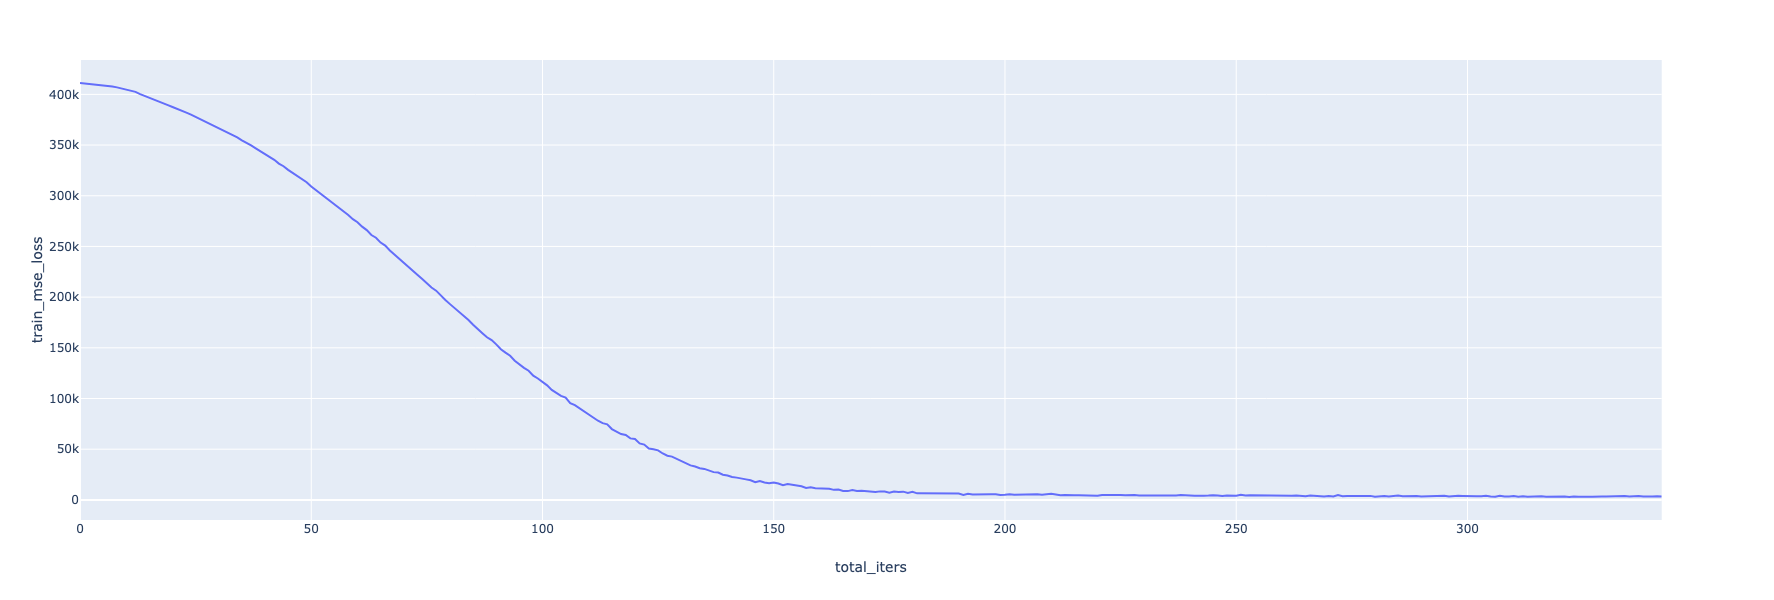

In [24]:
fig = px.line(trainer.training_info, x='total_iters', y='train_mse_loss')
fig.show()


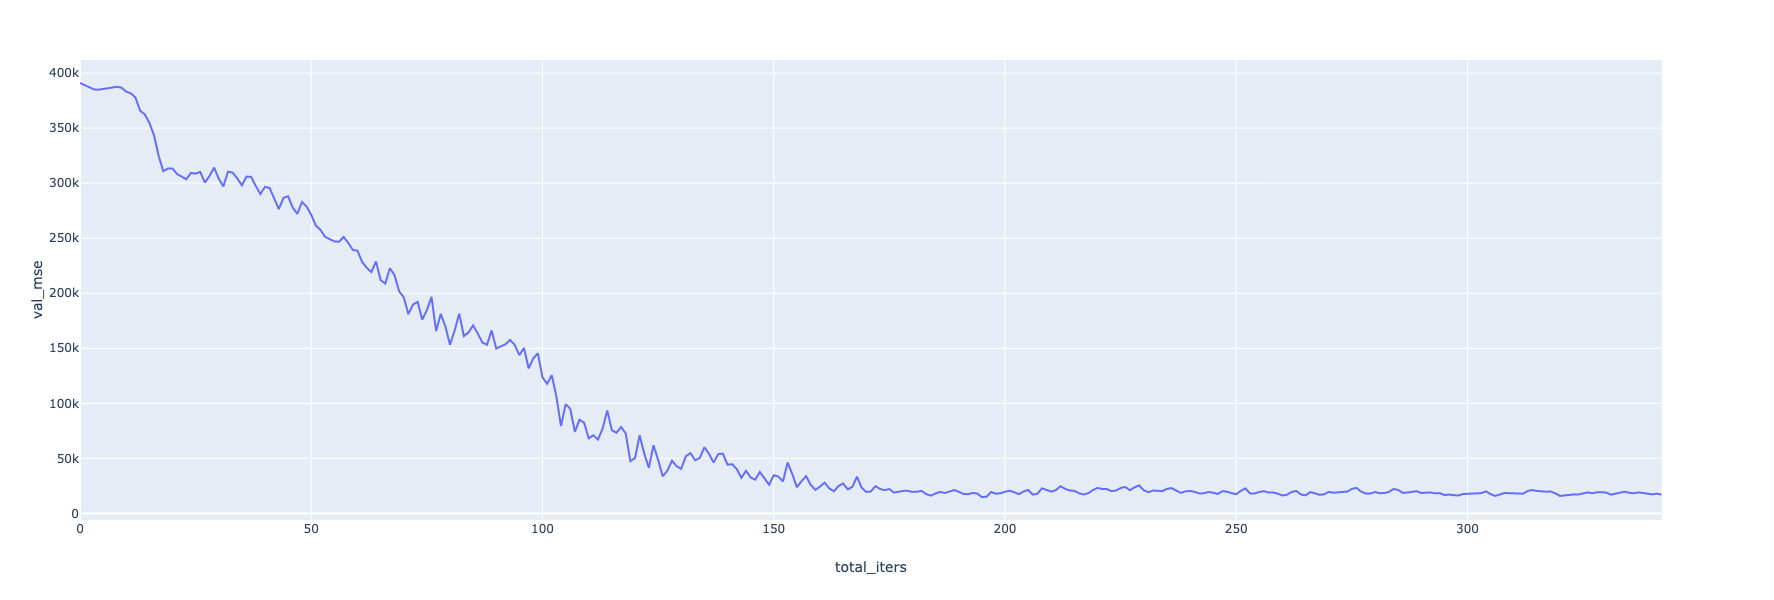

In [25]:
fig = px.line(trainer.training_info, x='total_iters', y='val_mse')
fig.show()


Missing directory and/or file name information!


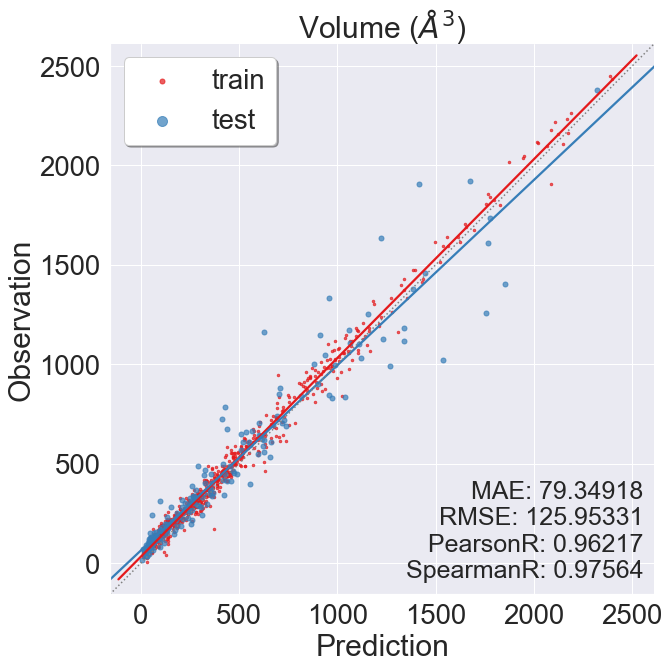

In [26]:
y_pred, y_true = trainer.predict(dataset=val_dataset, checkpoint='pearsonr:1')
y_fit_pred, y_fit_true = trainer.predict(dataset=train_dataset, checkpoint='pearsonr:1')
draw(y_true, y_pred, y_fit_true, y_fit_pred, prop_name='Volume ($\AA^3$)')

In [30]:
from torch import nn
from collections import OrderedDict

model = nn.Sequential(
    nn.Sequential(OrderedDict(layer=nn.Linear(10, 7), act_func=nn.ReLU())),
    nn.Sequential(OrderedDict(layer=nn.Linear(7, 4), act_func=nn.ReLU())),
    nn.Sequential(OrderedDict(layer=nn.Linear(4, 1))),
)

In [34]:
for n, m in model.named_children():
    print(n, m.layer)

0 Linear(in_features=10, out_features=7, bias=True)
1 Linear(in_features=7, out_features=4, bias=True)
2 Linear(in_features=4, out_features=1, bias=True)
